In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

# accessing data library
from statsbombpy import sb

# opening the libraries as DF's
from mplsoccer import Sbopen
parser = Sbopen()

# plotting
import os
import pathlib
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mplsoccer import Pitch
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [14]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'pass_cross', 'pass_assisted_shot_id', 'pass_shot_assist',
       'shot_statsbomb_xg', 'shot_key_pass_id', 'outcome_id', 'outcome_name',
       'technique_id', 'technique_name', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'end_z', 'aerial_won', 'off_camera',
       'counterpress', 'pass_switch', 'dribble_nutmeg', 'shot_first_time',
       'pass_no_touch', 'shot_one_on_one', 'shot_ope

In [16]:
df[df['type_name'] == 'Pass'][['type_name','sub_type_name']]

,type_name,sub_type_name
4,Pass,Kick Off
7,Pass,NaN
10,Pass,NaN
14,Pass,NaN
24,Pass,Goal Kick
...,...,...
3733,Pass,NaN
3736,Pass,NaN
3742,Pass,Corner
3745,Pass,NaN


In [19]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'pass_cross', 'pass_assisted_shot_id', 'pass_shot_assist',
       'shot_statsbomb_xg', 'shot_key_pass_id', 'outcome_id', 'outcome_name',
       'technique_id', 'technique_name', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'end_z', 'aerial_won', 'off_camera',
       'counterpress', 'pass_switch', 'dribble_nutmeg', 'shot_first_time',
       'pass_no_touch', 'shot_one_on_one', 'shot_ope

In [20]:
df.shape

(3758, 71)

In [21]:
parser.lineup(69301).reset_index(drop=True)

,player_id,player_name,player_nickname,jersey_number,match_id,team_id,team_name,country_id,country_name
0,4633,Magdalena Lilly Eriksson,Magdalena Eriksson,6,69301,858,Sweden Women's,220,Sweden
1,4640,Rut Hedvig Lindahl,Hedvig Lindahl,1,69301,858,Sweden Women's,220,Sweden
2,10205,Olivia Alma Charlotta Schough,Olivia Schough,22,69301,858,Sweden Women's,220,Sweden
3,10215,Fridolina Rolfö,Fridolina Rolfö,18,69301,858,Sweden Women's,220,Sweden
4,10220,Kosovare Asllani,Kosovare Asllani,9,69301,858,Sweden Women's,220,Sweden
5,10221,Elin Ingrid Johanna Rubensson,Elin Rubensson,23,69301,858,Sweden Women's,220,Sweden
6,10222,Jonna Ann-Charlotte Andersson,Jonna Ann-Charlotte Andersson,2,69301,858,Sweden Women's,220,Sweden
7,10224,Sara Caroline Seger,Sara Caroline Seger,17,69301,858,Sweden Women's,220,Sweden
8,10229,Emma Stina Blackstenius,Stina Blackstenius,11,69301,858,Sweden Women's,220,Sweden
9,10230,Linda Brigitta Sembrant,Linda Sembrant,3,69301,858,Sweden Women's,220,Sweden


In [11]:
df, related, freeze, tactics = parser.event(3764234)

In [29]:
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')
passes[['x','y','end_x','end_y']]

,x,y,end_x,end_y
id,,,,
8d5673e4-0d1b-48a1-8945-38f7ea98c548,60.0,40.0,61.9,40.9
56fa96cb-0ee2-4414-be1c-ab35887c7431,82.6,37.6,78.4,58.5
de86424c-7015-4948-b898-015377a67f07,84.7,65.3,98.9,77.9
ef4b5f7d-1989-4dba-b37e-d59b41abee14,94.7,75.5,93.3,64.3
c6fecc55-51ad-4779-b38a-51dbcd12d270,94.2,64.6,117.4,54.7
...,...,...,...,...
85b5ba1d-d278-41a7-b249-1180c76b6cdd,76.1,19.2,89.6,23.0
147e2ecc-fef1-4d1d-acdd-332139c5a98a,90.9,18.5,101.2,4.5
7ddc4410-9545-4cf1-8b05-f8ab730bb08c,102.0,7.7,84.8,5.9


In [26]:
df, related, freeze, tactics = parser.event(69301)
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')
passes

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,dribble_overrun,block_deflection,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,
8d5673e4-0d1b-48a1-8945-38f7ea98c548,5,1,00:00:00.140000,0,0,2,0.168730,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56fa96cb-0ee2-4414-be1c-ab35887c7431,9,1,00:00:05.143000,0,5,2,1.173625,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
de86424c-7015-4948-b898-015377a67f07,12,1,00:00:07.844000,0,7,2,1.019100,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ef4b5f7d-1989-4dba-b37e-d59b41abee14,15,1,00:00:10.586000,0,10,2,0.700000,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c6fecc55-51ad-4779-b38a-51dbcd12d270,19,1,00:00:11.326000,0,11,2,4.150000,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85b5ba1d-d278-41a7-b249-1180c76b6cdd,3271,2,00:48:09.673000,93,9,187,0.988864,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147e2ecc-fef1-4d1d-acdd-332139c5a98a,3274,2,00:48:11.298000,93,11,187,1.533881,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7ddc4410-9545-4cf1-8b05-f8ab730bb08c,3277,2,00:48:13.680000,93,13,187,1.148229,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


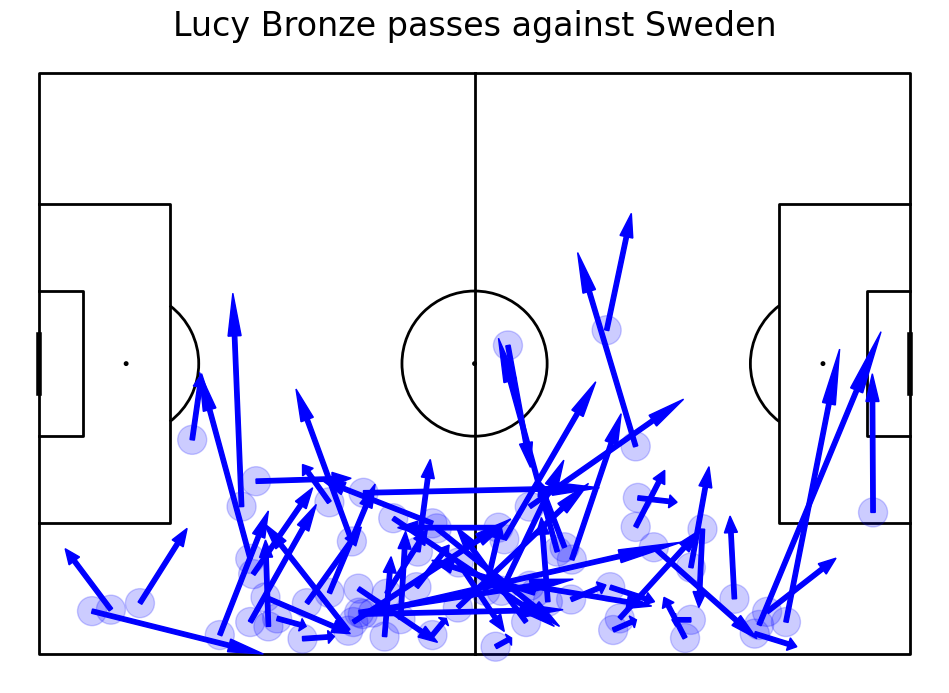

In [32]:
#drawing pitch
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))

for i,thepass in passes.iterrows():
    #if pass made by Lucy Bronze
    if thepass['player_name']=='Lucy Bronze':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2,color="blue")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color="blue")
        ax.add_patch(passArrow)

ax.set_title("Lucy Bronze passes against Sweden", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

In [44]:
pd.DataFrame(thepass).head(35)

,95dc3f18-7494-4b78-b7bd-c07845c55b72
index,3287
period,2
timestamp,00:49:19.754000
minute,94
second,19
possession,189
duration,2.8226
match_id,69301
type_id,30
type_name,Pass


In [36]:
df_pass

,x,y,end_x,end_y
11,84.7,65.3,98.9,77.9
85,67.6,70.6,84.4,73.4
88,79.1,76.7,82.3,75.3
179,29.5,69.0,37.7,57.1
185,29.1,66.9,22.1,41.2
...,...,...,...,...
3071,64.6,37.5,67.7,54.3
3149,52.0,70.8,56.5,65.0
3171,44.6,74.5,72.2,73.9
3228,67.1,75.6,57.5,62.5


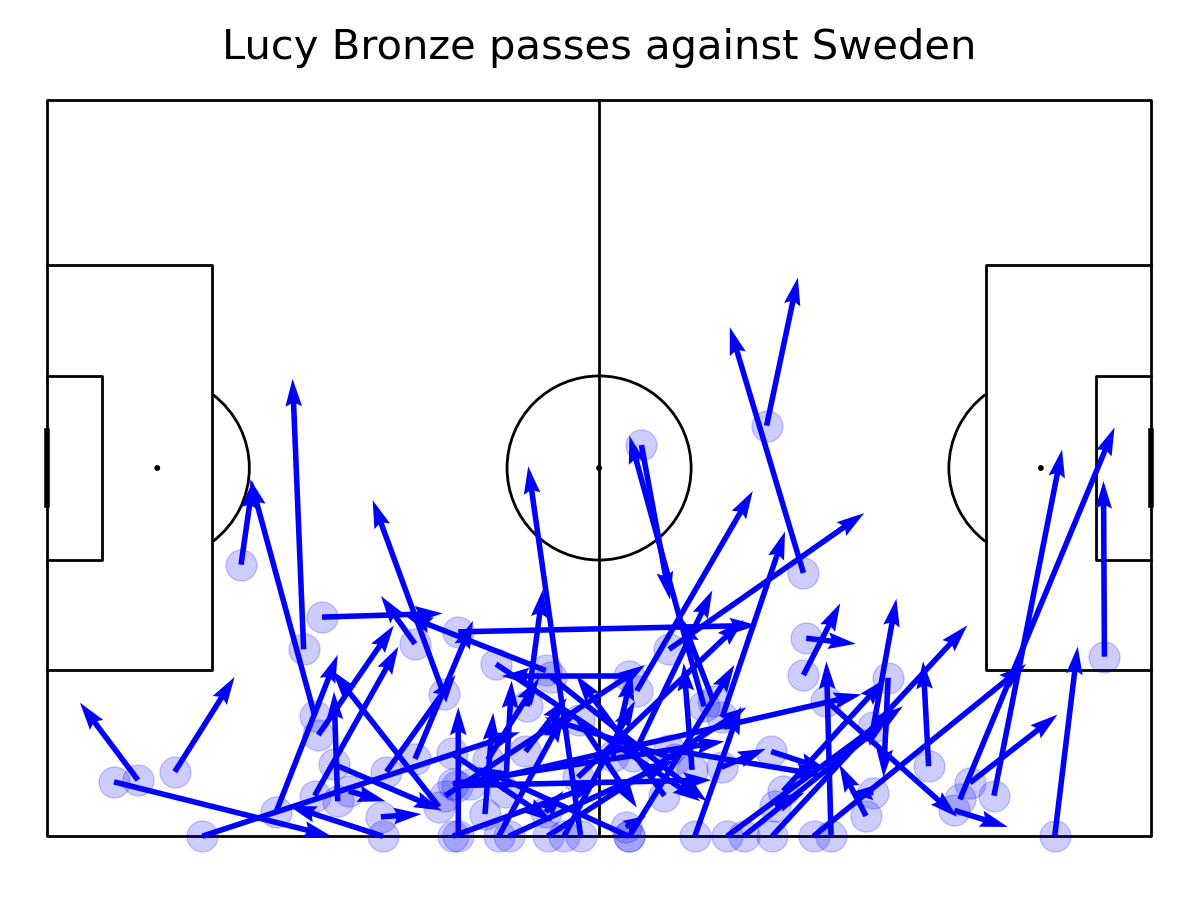

In [33]:
mask_bronze = (df.type_name == 'Pass') & (df.player_name == "Lucy Bronze")
df_pass = df.loc[mask_bronze, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Lucy Bronze passes against Sweden", fontsize = 30)
plt.show()